<a href="https://colab.research.google.com/github/tamarasessink/Master_Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tamarasessink/Master_Thesis.git

Cloning into 'Master_Thesis'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [3]:
import h5py

In [34]:
!python /content/Master_Thesis/main_moco.py \
  -a resnet50 \
  --lr 0.03 \
  --batch-size 256 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \


2022-12-22 21:35:39.477224: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Use GPU: 0 for training
=> creating model 'resnet50'
MoCo(
  (encoder_q): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
  [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
  [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
  [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]
  [0.00020907 0.00020907 0.00020907 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

TypeError: ignored

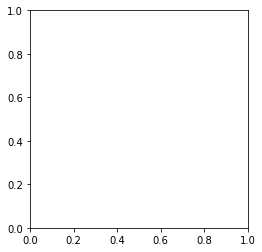

In [33]:
import pylab as plt
f = h5py.File('/content/drive/MyDrive/train_test_2016-2019_input-length_12_img-ahead_6_rain-threshhold_50.h5', "r")
traindir = f['/train/images']
print(traindir[0].squeeze())
plt.imshow(traindir[0])

In [36]:
!git push https://github.com/tamarasessink/Master_Thesis.git

fatal: not a git repository (or any of the parent directories): .git
